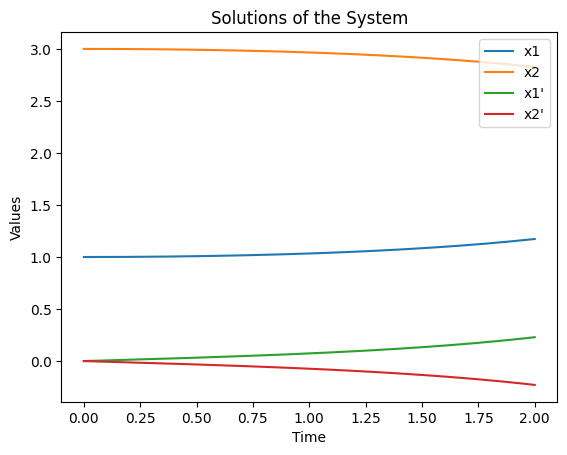

In [61]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def rhs(state, time, m1, m2, L):
    eps = 0
    x, y, dxdt, dydt = state
    d2xdt = -m2 / (L - y + x)**2 + m2 / ((x - y)**2 + eps) + m1 / L**2
    d2ydt = -m1 / ((y - x)**2 + eps) - m2 / L**2 + m1 / (L + x - y)**2
    return dxdt, dydt, d2xdt, d2ydt

init = [
    1, # x1(0)
    3, # x2(0)
    0, # x1'(0)
    0 # x2'(0)
]

L = 4
m1 = 1
m2 = 1
times = np.linspace(0, 2, 1000)
values = odeint(rhs, init, times, args=(m1, m2, L), tfirst=False)

plt.plot(times, values[:, 0], label="x1")
plt.plot(times, values[:, 1], label="x2")
plt.plot(times, values[:, 2], label="x1'")
plt.plot(times, values[:, 3], label="x2'")

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Solutions of the System")
plt.legend()

plt.show()

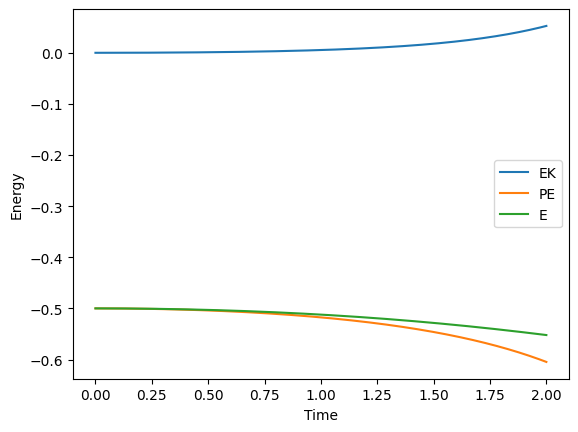

In [62]:
ek = (1/2) * m1 * values[:, 2]**2 + (1/2) * m2 * values[:, 3]**2
pe_real = -m1 * m2 / (values[:, 1] - values[:, 0])
e = ek + pe_real
plt.plot(times, ek, label="EK")
plt.plot(times, pe_real, label="PE")
plt.plot(times, e, label="E")

plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.show()